# Chapter 2: Parametric Test
In this chapter, we will learn how to perform a parametric test in Python.


In [14]:
# import of some library

import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy as sp

# Configuração para o notebook e plotagem de imagens
from IPython.display import Latex
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def jupyter_settings():
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
   # display(HTML('<style>.container { width:100% !important; }</style>'))
    sns.set()

jupyter_settings()

## 1 - Assumptions of parametric tests

The parametric tests make assumptions about population data and this assumptions are:

- Normally distributed population data;
- Samples are independent;
- Equal population variances (when comparing two or more groups).


### 1.1 - Testing for normally distributed data

#### 1.1.1 - Visual inspection

To identify if the data are normalized, we can use the visual inspection, for this, wee can use **Quantile-Quantile (QQ)** plot and histograms to visually inspect the distributions.

In [2]:
mu, sigma = 0, 1.1 # mean and standard deviation
normally_distributed = np.random.normal(mu, sigma, 1000)

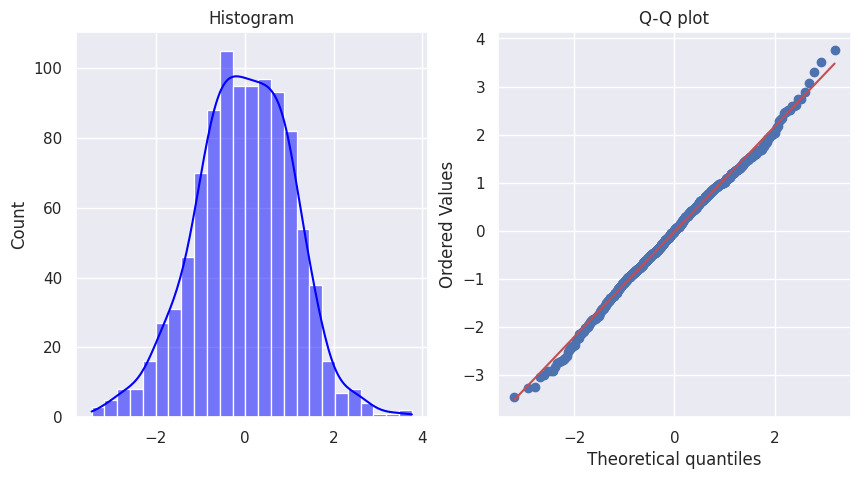

In [3]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.histplot(normally_distributed,kde=True, ax=axes[0], color="blue")
axes[0].set_title("Histogram")

stats.probplot(normally_distributed, plot=axes[1])
axes[1].set_title("Q-Q plot")

plt.show()

In the QQ plots we can see the data are normally distributed. If the points mostly approximate the 45-degree red line, the data are normally distributed, otherwise the data are not normally distributed. In our case, the data are normally distributed.

For situations where we might not want to perform visual inspection, we can use other alternatives approaches. 

#### 1.1.2 - Kolmogorov-Smirnov test



The Kolmogorov test can be used to test the null hypothesis that a given sample distribution is normally distributed. In other words, we have the hypothesis:
- $H_0$: the data are normally distributed;
- $H_a$: the data are **NOT** normally distributed.

If $p > \alpha$, we fail to reject the null hypothesis. The data can be normally distributed or we don't have enough evidence to reject the null hypothesis.

If $p < \alpha$, we reject the null hypothesis and the data is not normally distributed.

In [4]:
mu, sigma = 0, 1
kol_normally_distributed = np.random.normal(mu, sigma, 1000)

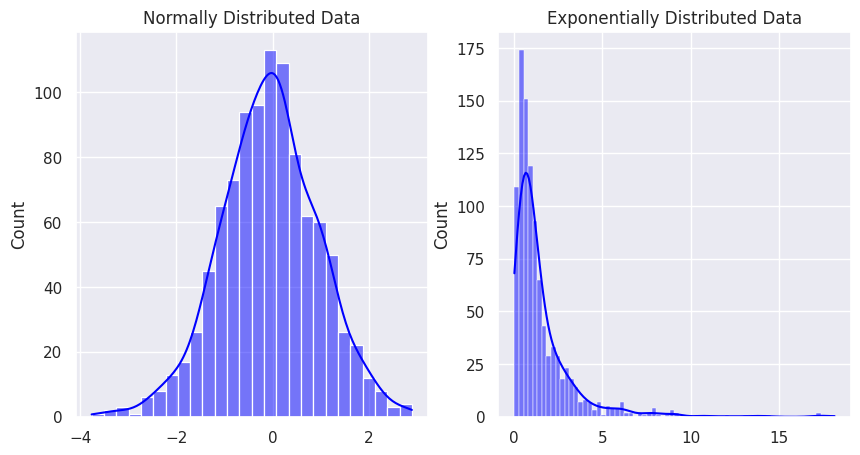

In [5]:
fig, axes = plt.subplots(1, 2,figsize=(10, 5))

sns.histplot(kol_normally_distributed, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Normally Distributed Data")

sns.histplot(np.exp(kol_normally_distributed), kde=True, ax=axes[1], color="blue")
axes[1].set_title("Exponentially Distributed Data")

plt.show()

In [6]:
stats.kstest(kol_normally_distributed, stats.norm.cdf)

KstestResult(statistic=np.float64(0.045707868517936734), pvalue=np.float64(0.02969504497250719), statistic_location=np.float64(0.38341007130415033), statistic_sign=np.int8(1))

Now assuming the same data, but transform it exponentially to be right-skewed, the same test indicates the data is no longer normally distributed:

In [7]:
stats.kstest(np.exp(kol_normally_distributed), stats.norm.cdf)

KstestResult(statistic=np.float64(0.5244889207456409), pvalue=np.float64(9.477640173762019e-257), statistic_location=np.float64(0.10418547752162716), statistic_sign=np.int8(-1))

We saw to results. The first indicates the data have the p-value of 0.89,  which is greater than the level of significance (0.05), and we can't reject the null hypothesis. The data can be normally distributed or we don't have enough evidence to reject the null hypothesis.

In the second case, the p-value is 4.794-272, which is less than the level of significance (0.05), and we reject the null hypothesis. The data is not normally distributed.

#### 1.1.3 -Anderson-Darling test

Similar to Kolmogorov-Smirnov test, the Anderson-Darling test can be used to test the null hypothesis that a given sample distribution is normally distributed. In other words, we have the hypothesis:
- $H_0$: the data are normally distributed;
- $H_a$: the data are **NOT** normally distributed.

But in AD we can test other distribution, but the default is `dist='norm'`.


In [8]:
mu, sigma = 19, 1.7
AD_normally_distributed = np.random.normal(mu, sigma, 1000)
not_AD_normally_distributed = np.exp(AD_normally_distributed)

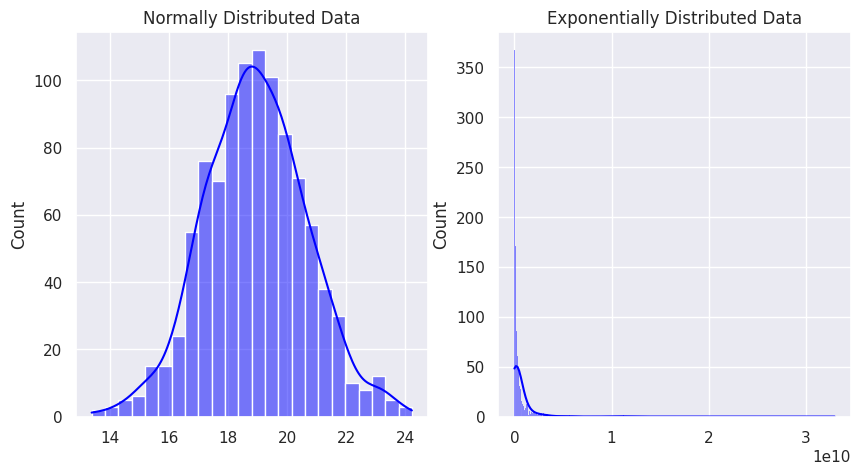

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(AD_normally_distributed, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Normally Distributed Data")

sns.histplot(np.exp(AD_normally_distributed), kde=True, ax=axes[1], color="blue")
axes[1].set_title("Exponentially Distributed Data")

plt.show()

In [10]:
def anderson_test(data):
    test_statistic, critical_values, significance_levels = stats.anderson(data, dist = 'norm')
    df_anderson = pd.DataFrame({'Test Statistic':np.repeat(test_statistic, len(critical_values)),
                                'Critical Values':critical_values,
                                'Significance Level': significance_levels})
    df_anderson.loc[df_anderson['Test Statistic'] >= df_anderson['Critical Values'], ['Normally Distributed']] = 'No'
    df_anderson.loc[df_anderson['Test Statistic'] < df_anderson['Critical Values'], ['Normally Distributed']] = 'Yes'
    return df_anderson;


In [11]:
mu,  sigma = 19, 1.7

normally_distributed = np.random.normal(mu, sigma, 1000)
anderson_test(normally_distributed)

,Test Statistic,Critical Values,Significance Level,Normally Distributed
0,0.303318,0.574,15.0,Yes
1,0.303318,0.653,10.0,Yes
2,0.303318,0.784,5.0,Yes
3,0.303318,0.914,2.5,Yes
4,0.303318,1.088,1.0,Yes


The code shows the test statist, the critical values and the significance levels. We can see that, for all critical values, the data is normally distributed or we don't have enough evidence to reject the null hypothesis.

The next exemplo, we test an exponential transformation of the normally distributed data.

In [12]:
not_normally_distributed = np.exp(normally_distributed)
anderson_test(not_normally_distributed)

,Test Statistic,Critical Values,Significance Level,Normally Distributed
0,211.886203,0.574,15.0,No
1,211.886203,0.653,10.0,No
2,211.886203,0.784,5.0,No
3,211.886203,0.914,2.5,No
4,211.886203,1.088,1.0,No


In this other exemple, we see that the data is not normally distributed.

### 1.2 - Testing for equal variance

The test for equal variance can be used to test the null hypothesis that two samples have the **same variance** two or more groups.




#### 1.2.1 - Levene's test

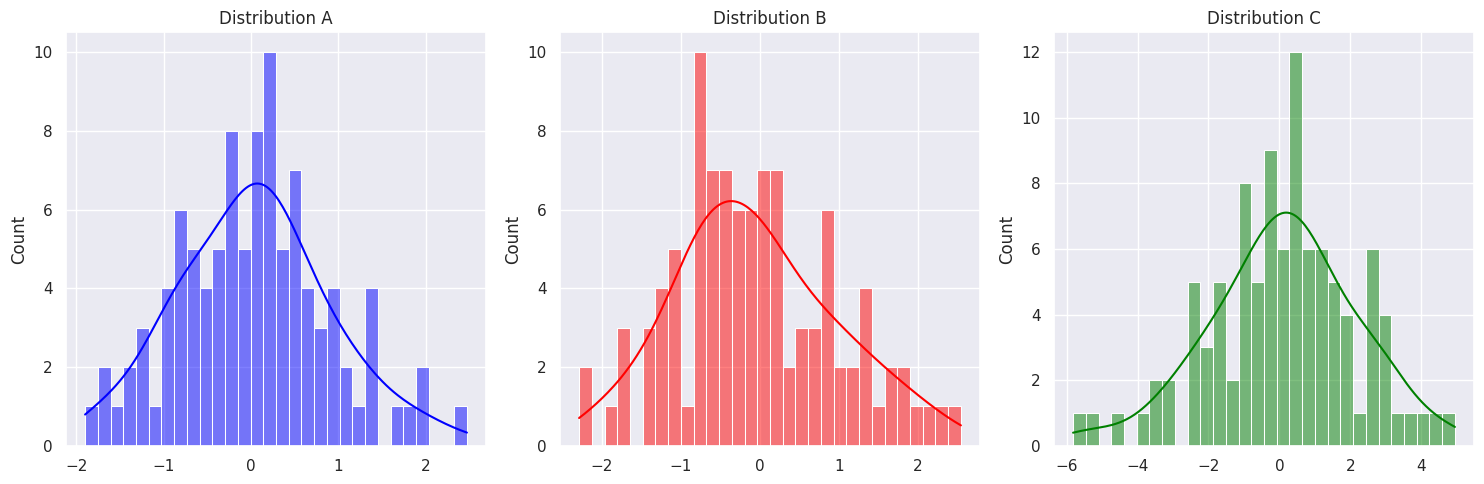

In [16]:
from scipy.stats import levene
np.random.seed(26)
mu1, sigma1, mu2, sigma2, mu3, sigma3 = 0, 0.9, 0, 1.1, 0, 2

distro1, distro2, distro3 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

distro1 = np.random.normal(mu1, sigma1, 100)
distro2 = np.random.normal(mu2, sigma2, 100)
distro3 = np.random.normal(mu3, sigma3, 100)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primeiro histograma
sns.histplot(distro1, bins=30, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Distribution A")

# Segundo histograma
sns.histplot(distro2, bins=30, kde=True, color="red", ax=axes[1])
axes[1].set_title("Distribution B")

# Terceiro histograma
sns.histplot(distro3, bins=30, kde=True, color="green", ax=axes[2])
axes[2].set_title("Distribution C")

# Ajustar layout
plt.tight_layout()
plt.show()


In [17]:
f_statistic, p_value = levene(distro1, distro2, distro3)
if p_value <= 0.05:
    print(f"The distributions do not have homogenous variance. P-value = {p_value:.4f}, F-statistic = {f_statistic:.4f}")
else:
    print(f"The distributions do have homogenous variance. P-value = {p_value:.4f}, F-statistic = {f_statistic:.4f}")


The distributions do not have homogenous variance. P-value = 0.0000, F-statistic = 30.3979


In the exemplo before, we see three distributions and we test the Levene's test to see if they have the same variance. The results of the test show the P-value = 0, in this case, we reject the null hypothesis and we can say that the distributions do not have the same variance.

#### 1.2.2 - Fisher's F-test

Is another test for homogeneity of variance for two groups **at a time**.

The calculated F-statistic is the variance of group one divided by the variance of group two. Group one is always the group with the larger variance. 

Using the preceding data, the distro3 has a large variance of 3, so that group's variance will be the numerator when calculating the F-statistic.

The null hypothesis is the variance of all groups is the same. The alternative hypothesis is at least one of the group the variance is significantly different from the others.

In [18]:
from scipy.stats import f

def f_test(inputA, inputB):
    group1 = np.array(inputA)
    group2 = np.array(inputB)

    if np.var(group1) > np.var(group2):
        f_statistic = np.var(group1) / np.var(group2)
        numeratorDegreesOfFreedom = group1.shape[0] - 1
        denominatorDegreesofFreedom = group2.shape[0] - 1
    else:
        f_statistic = np.var(group2) / np.var(group1)
        numeratorDegreesOfFreedom = group2.shape[0] - 1
        denominatorDegreesofFreedom = group1.shape[0] - 1
    p_value = 1 - f.cdf(f_statistic, numeratorDegreesOfFreedom, denominatorDegreesofFreedom)

    if p_value <= 0.05:
        print(f'The distributions do not have homogenous variance. P-value = {p_value:.4f}, F-statistic = {f_statistic:.4f}')
    else:
        print(f'The distributions do not have homogenous variance. P-value = {p_value:.4f}, F-statistic = {f_statistic:.4f}')

f_test(distro3,distro1)

The distributions do not have homogenous variance. P-value = 0.0000, F-statistic = 5.6309


## 2 - T-test -  A parametric hypothesis test

Similar to the previous chapters, which we use the z-test for means, was applied when population standard deviation were known. However, in the real world, we don't know the population standard deviation or is not easy to obtain it. For cases like this, we use the t-test.

$$ t = \frac{\bar{x} - \mu}{s/\sqrt{n}} $$

Where, $\bar{x}, \mu, s$ and $n$ are the sample mean, population mean, sample standard deviation and sample size, respectively.

The following code illustrates the standard normal distribution with 1000 samples and t-distributions with two sample sizes, 3 and 16.

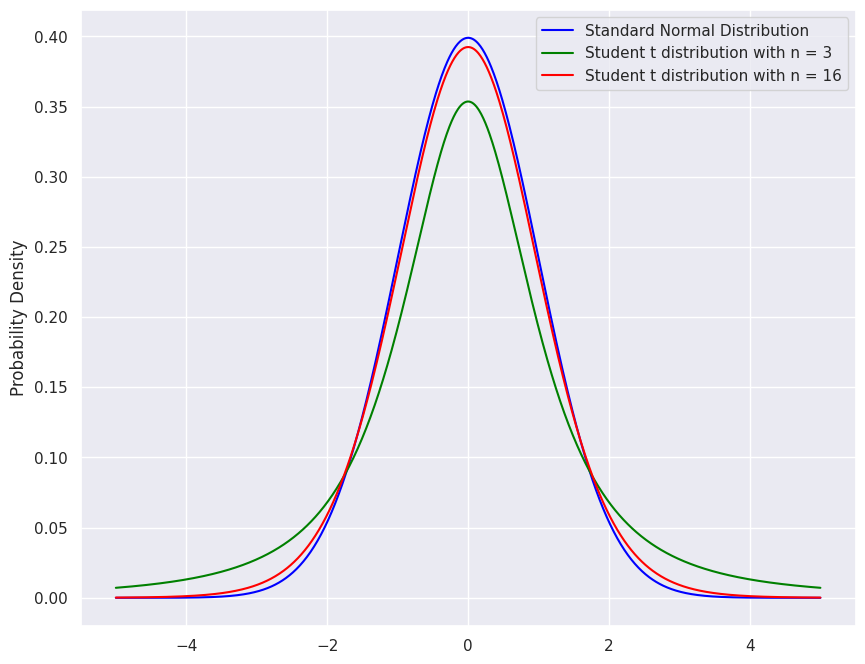

In [30]:
# crating normal distribution

x = np.linspace(-5, 5, 1000) # Create 1000 points from -5 to 5

y = stats.norm.pdf(x) # Create probability function density for each point x normal distribution

# Creating Student t distributions for 2 samples sizes n = 3 and n = 16
# the degree freedom is df = n - 1
degree_freedom1 = 2
t_dist1 = stats.t.pdf(x, degree_freedom1)

degree_freedom2 = 15
t_dist2 = stats.t.pdf(x, degree_freedom2)


# ploting the distributions
fig = plt.figure(figsize=(10,8))

plt.plot(x, y, color='blue', label='Standard Normal Distribution')
plt.plot(x, t_dist1, color='green', label='Student t distribution with n = 3')
plt.plot(x, t_dist2, color='red', label='Student t distribution with n = 16')
plt.ylabel('Probability Density')

plt.legend()
plt.show()

The three curves have similar symmetry and shapes but there is more variability for a sample with a smaller size.
If the sample size incresse, the curve will be more close to the blue curve, which is the normal distribution. Normally, we chose the sample size that is larger than 30. 

### 2.1 - T-test for means

To perform a t-test, the following assumptions need to be satisfied:

- **Normality:** The sample is normally distributed.
- **Independence:** The observations of one sample are independent of one another.

#### 2.1.1 - One-sample t-test



Similar to the one-sample z-test, we can use the t-test to test a hypothesis about the mean of a sample.

Three null and alternative hypothesis corresponding to left-tailed, right-tailed and two-tailed tests are presented as follows:

$$ H_0: \mu \geq \mu_0 \hspace{1cm} H_0: \mu \leq \mu_0 \hspace{1cm} H_0: \mu = \mu_0 $$
$$ H_0: \mu < \mu_0 \hspace{1cm} H_0: \mu \> \mu_0 \hspace{1cm} H_0: \mu \neq \mu_0 $$

The next point is the level of significance $\alpha$, which needs to be specified following the research purpose. We can separate in two approaches: the p-value and the critical value.

- **p-value:** The rejection rule (reject $H_0$ - the null hypothesis) is when the p-value is **less than or equal** to the specified level of significance chosen.
- **Critical value:** The rejection rule is when the test statistic are:
    - Is less than or equal to the critical value $-t_\alpha$ for the left-tailed t-test;
    - Greater than or equal to $t_\alpha$ for a right-tailed t-test;
    - Is less than or equal to $-t_{\alpha/2}$ or greater than or equal to $t_{\alpha/2}$ for a two-tailed test


To find the p-value based on the value of the student $t$ distribution, we can use the following syntax:
```python
scipy.stats.t.sf(abs(x), df)
```

Where $x$ is the test statistic and $df$ is the degree of freedom ($df = n - 1$ where $n$ is the sample size)

Consider for exemple, to find the p-value associated with a t-score of 1.9 with the degree of freedom 14 in a left-tailed test, the code is:

In [21]:
print(f" The p-value for left-tailed  test is {round(stats.t.sf(abs(1.9), df=14), 4)}")

 The p-value for left-tailed  test is 0.0391


The output is 0.0391. If the level of significance $\alpha = 0.05$, then we reject the null hypothesis because the p-value is less than 0.05.
Similar is for a right-tailed test. For a two-tailed test we need to multiply the value by 2.

In [22]:
print(f" The p-value for two-tailed test is {round(stats.t.sf(abs(1.9), df=14)*2, 4)}")

 The p-value for two-tailed test is 0.0782


The result for two-tailed test is 0.0782, which is greater than the level of significance, so we do not reject the null hypothesis.

Now, to compute the critical value in Python, we use the following syntax:
`scipy.stats.t.ppf(q, df)`

Where $q$ is the level of significance and $df$ is the degree of freedom. 

In [23]:
alpha = 0.05 # level of significance

df = 15 # degree of freedom

#find t critical value for the left-tailed test
print(f"The critical value for left-tailed test is {stats.t.ppf(q=alpha, df=df)}")
#find t critical value for the right-tailed test
print(f"The critical value for right-tailed test is {stats.t.ppf(q=1-alpha, df=df)}")
#find t critical value for the two-tailed test
print(f"The critical value for two-tailed test are {-stats.t.ppf(q=1-alpha/2, df=df)} and {stats.t.ppf(q=1-alpha/2, df=df)}")

The critical value for left-tailed test is -1.7530503556925552
The critical value for right-tailed test is 1.7530503556925547
The critical value for two-tailed test are -2.131449545559323 and 2.131449545559323


Now, let's randomly choose 30 students from a high school and score their IQ. 

We would like to test the claim that the mean IQ score of the distribution of the students from this high school is higher than 100. This means that we will perform a right-tailed test. The IQ score of 30 students are given here:

In [24]:
IQscores = [113, 107, 106, 115, 103, 103, 107, 102, 108, 107, 104,
            104, 99, 102, 102, 105, 109, 97, 109, 103, 103, 100,
            97, 107, 116, 117, 105, 107, 104, 107]

Before conducting the hypothesis testing, we will check normality and independence assumptions.

The assumption of independence is satisfied if the sample is randomly selected from the population of high school students at this school.

For normality, we will check the histogram and QQ plots of IQ score data:

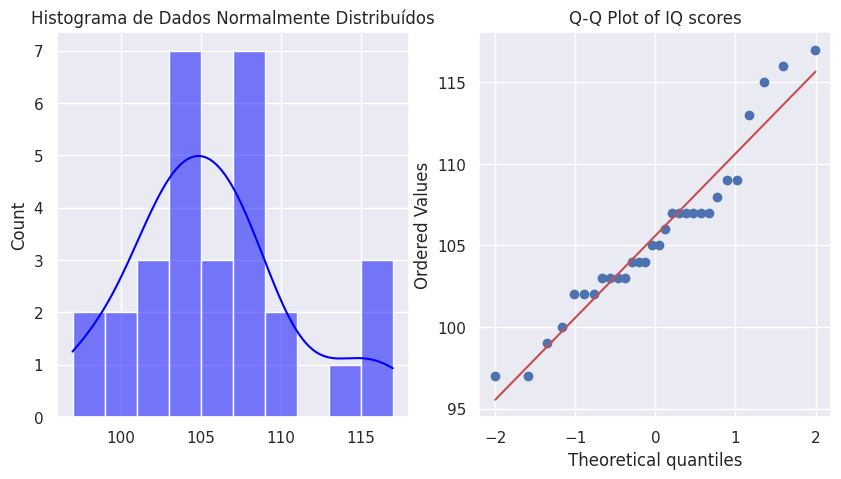

In [25]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.histplot(IQscores, bins=10, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Histograma de Dados Normalmente Distribuídos")

# Segundo gráfico: Q-Q Plot
stats.probplot(IQscores, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of IQ scores")

plt.show()

From the QQ-plot, we can see that the points are very close the red line, which indicates that the data is normally distributed. So, we can go on and perform the t-test.

First, we define the null hypothesis and the alternative hypothesis:
$$H_0: \mu \leq 100$$
$$H_a: \mu > 100$$

The level of significance is $\alpha = 0.05$.

Here we will another function:
`stats.ttest_1samp(data, popmean, alternative='greater')`

Where:
- `data` The population from the sample;
- `popmean`The expected value in the null hypothesis;
- `alternative` is the alternative hypothesis, which can be 'two-sided', 'less' or 'greater'.

In [33]:
# perform one sample t-test
t_statistic, p_value = stats.ttest_1samp(IQscores, popmean=100, axis=0, alternative='greater')

print(f"The test statistic is {t_statistic} and the correspondent p-value is {p_value}.")

The test statistic is 6.159178830896831 and the correspondent p-value is 5.15076734562176e-07.


Because the p-value is less than 0.05, we have enough evidence to reject the null hypothesis and accept the alternative hypothesis. The mean IQ score of the distribution of the students from this school is higher than 100.

Addition, with 95% confidence, the mean IQ score lies between 104.08 and 107.12. Let's check this:

The confidence interval is given by:

$$ CI = \bar{x} \pm t_{\alpha} \frac{s}{\sqrt{n}} $$

In [27]:
IQmean = np.array(IQscores).mean() # sample mean
IQsd = np.array(IQscores).std() # sample standard deviation

sample_size = len(np.array(IQscores)) # sample size
df = sample_size-1 # degree of freedom
alpha = 0.05 # level of significance
t_crit = stats.t.ppf(q=1-alpha, df=df) # critical value obs. 1-alpha because is a right-tailed test
confidence_interval = (round(float(IQmean-IQsd*t_crit/np.sqrt(sample_size)),4), round(float(IQmean+IQsd*t_crit/np.sqrt(sample_size)),4))
print(f" The Confidence interval is {confidence_interval}")


 The Confidence interval is (104.0811, 107.1189)


#### 2.1.2 - Two-sample t-test (pooled t-test)



Similar to two-sample z-test for means, the two-sample t-test for means has three forms for the null and alternative hypothesis:

$$ H_0: \mu_1 - \mu_2 \geq \Omega \hspace{1cm} H_0: \mu_1 - \mu_2 \leq \Omega \hspace{1cm}  H_0: \mu_1 - \mu_2 = \Omega $$
$$ H_a: \mu_1 - \mu_2 < \Omega \hspace{1cm} H_a: \mu_1 - \mu_2 > \Omega \hspace{1cm}  H_a: \mu_1 - \mu_2 \neq \Omega $$

But, somo assumptions need to be satisfied before conducting the test:

- **Normality:** Two samples are draw from their normally distributed populations;
- **Independence:** The observations of one sample are independent of one another;
- **Homogeneity of variance:** Both populations are assumed to have similar standard deviations.

1. To normality, we can use visual histograms and also QQ plots.\
2. For independence, let's assume that it satisfies.\
3. For equal standard deviation between the two samples, we will use the visualization and also use an F-test to have additional evidence.




In [34]:
IQscoresA = IQscores
IQscoresB = [102, 108, 110, 101, 98, 98, 97, 102, 102, 103,
             100, 99, 97, 97, 94, 100, 104, 98, 92, 104,
             98, 95, 92, 111, 102, 112, 100, 103, 103, 100]

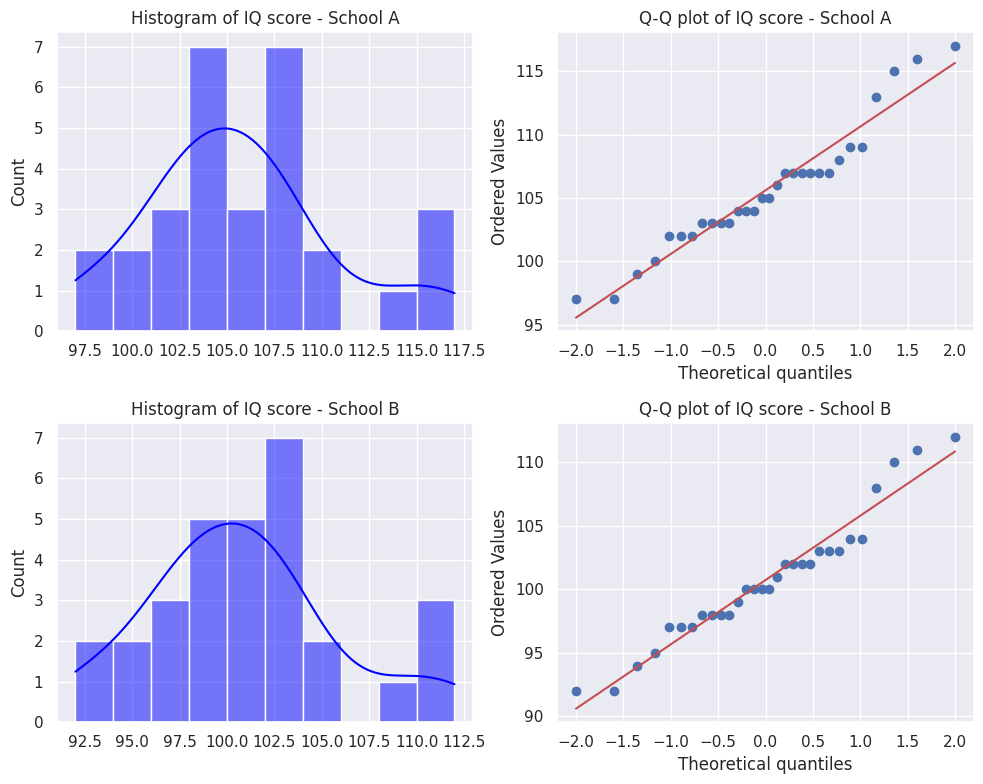

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(IQscoresA, bins=10, kde=True, ax=axes[0,0], color="blue")
axes[0,0].set_title("Histogram of IQ score - School A")

stats.probplot(IQscoresA, dist='norm', plot=axes[0,1])
axes[0,1].set_title("Q-Q plot of IQ score - School A")

sns.histplot(IQscoresB, bins=10, kde=True, ax=axes[1,0], color="blue")
axes[1,0].set_title("Histogram of IQ score - School B")

stats.probplot(IQscoresB, dist='norm', plot=axes[1,1])
axes[1,1].set_title("Q-Q plot of IQ score - School B")

plt.tight_layout()
plt.show()

We can visualize it by histogram, that both have a distribution similar to the normal distribution and we can notice this in the Q-Q plots, which the points are close to the red line.

To make somo affirmation about the equal variance, we will use the F-test, which the null hypothesis is that the variances are equal and the alternative hypothesis is that the variances are different.

In [36]:
# F-test

f = np.var(np.array(IQscoresA), ddof=1)/np.var(np.array(IQscoresB), ddof=1) # F statistic
dfA = np.array(IQscoresA).size-1
dfB = np.array(IQscoresB).size-1

p = 1 - stats.f.cdf(f, dfA, dfB) #p-value
print(f"The f-statistic is {f:.4f} and the p-value is {p:.4f}.")

The f-statistic is 0.9963 and the p-value is 0.5039.


The results shows that the p-value is $0.5039 > 0.05$. Remembering that the null hypothesis is that the variances of all groups ate the same, so we fail to reject the null hypothesis and we can say that the variances are equal.

After we confirm the three assumptions, we can proceed to the t-test.

Let's start with the null hypothesis and alternative hypothesis:

$$ H_0: \mu_A = \mu_B$$
$$ H_a: \mu_A \neq \mu_B$$

And we choose the level of significance $\alpha = 0.05$.

The t-test, when the assumption for equal variances is satisfied, the test statistic is computed as follows:

$$ t = \frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{S_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$

where
$$S_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2 - 2}}$$

The degree of freedom is shown by $df = n_1 + n_2 - 2$

The computation is doing by the file code:

In [39]:
from statsmodels.stats.weightstats import ttest_ind as ttest

t_statistic, p_value, degree_freedom = ttest(IQscoresA, IQscoresB, alternative='two-sided', usevar='pooled')

print(f" The test statistic is {t_statistic:.4f}, the p-value is {p_value:.4f} and the degree of freedom is {degree_freedom}.")

 The test statistic is 3.7814, the p-value is 0.0004 and the degree of freedom is 58.0.


Because the p-value < 0.05, we reject the null hypothesis and accept the alternative hypothesis. In other words, the mean IQ score of the two schools is different.

#### 2.1.3 - Two-sample t-test ( Welch's t-test)

Know we will make a practical two-sample t-test, when the data is normally distributed but the population standard deviations are unknown and unequal. 

In [40]:
sample1 = np.array([2, 3, 4, 2, 3, 4, 2, 3, 5, 8, 7, 10])
sample2 = np.array([30, 26, 32, 34, 28, 29, 31, 35, 36, 33, 32, 27])

In [41]:
print(f"The size of sample 1 is {len(sample1)}.\nThe size of sample 2 is {len(sample2)}")

The size of sample 1 is 12.
The size of sample 2 is 12


In [42]:
print(f"The standard deviation for sample 1 is {float(sample1.std()):.4f}.\nThe standard deviation for sample 2 is {float(sample2.std()):.4f}.")

The standard deviation for sample 1 is 2.4986.
The standard deviation for sample 2 is 3.0402.


We are assuming the independence is satisfied, and the size of the two samples are the same. We can se that the standard deviation is not equal or close. 

For cases where the sample size or the standard deviations are not equal, we will use Welch's t-test.

We can look too to the normality from the histogram and the Q-Q plot.

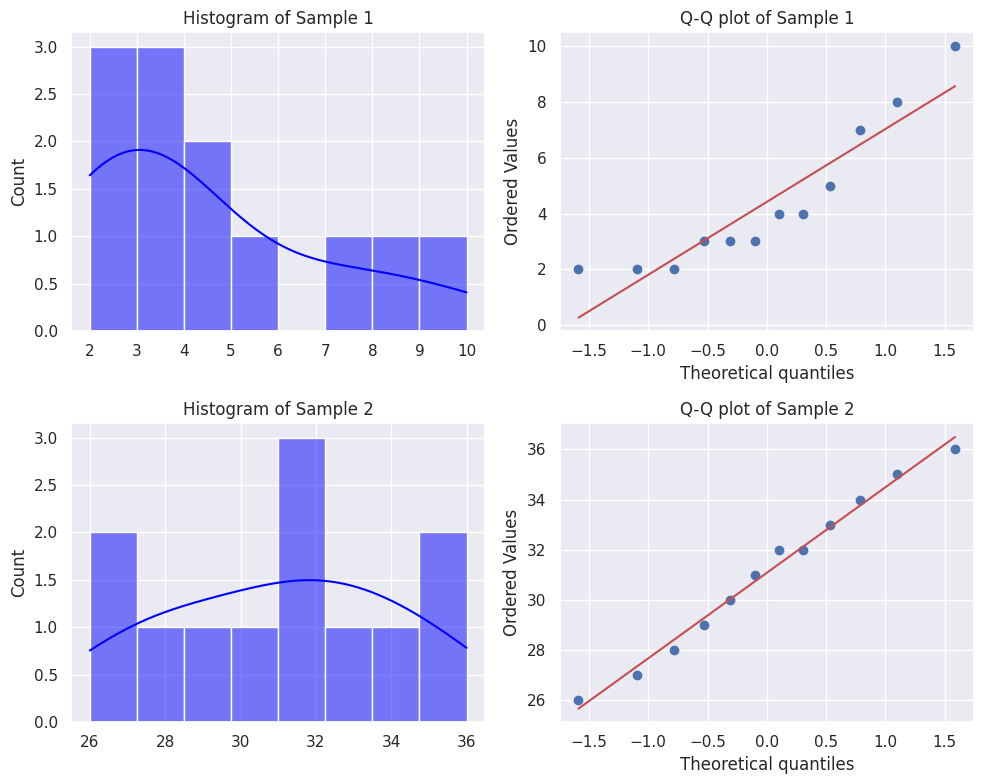

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))

sns.histplot(sample1, bins=8, kde=True, ax=axes[0,0], color="blue")
axes[0,0].set_title("Histogram of Sample 1")

stats.probplot(sample1, dist='norm', plot=axes[0,1])
axes[0,1].set_title("Q-Q plot of Sample 1")

sns.histplot(sample2, bins=8, kde=True, ax=axes[1,0], color="blue")
axes[1,0].set_title("Histogram of Sample 2")

stats.probplot(sample2, dist='norm', plot=axes[1,1])
axes[1,1].set_title("Q-Q plot of Sample 2")

plt.tight_layout()
plt.show()

We can visualize in the histograms that we have strong visual evidence against equal standard deviations by looking at the $x$ axis scale of the histograms. However, we can assuming the normality assumptions is satisfied. 

The null and alternative hypothesis are:

$$H_0: \mu_1 = \mu_2 $$
$$H_a: \mu_1\neq  \mu_2 $$

The level of significance is $\alpha = 0.05$. To calculate the p-value, we use the following syntax:

In [44]:
t_statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)
print(f"The test statistic is {t_statistic:.2f} add the p-value is {p_value}.")

The test statistic is -22.47 add the p-value is 2.842253653486516e-16.


The test statistic is -22.47 and the p-value is close to zero, which is less than the level of significance, so we reject the null hypothesis and we can say that the means of the two samples are different. 

#### 2.1.4 - Paired t-test

The paired t-test is used in studies when each element in a sample is tested twice (pre-test and post-test or repeated measures). The assumptions are set as follows:

- Differences are normally distributed
- Differences are independent between observations but dependent from one test to another test.


<div align='center'>

| Students | Pre-training score | Post-training score | Differences |
|----------|--------------------|---------------------|-------------|
| A        | 95                 | 95                  | 0           |
| B        | 98                 | 110                 | 12          |
| C        | 90                 | 97                  | 7           |
| D        | 115                | 112                 | -3          |
| E        | 112                | 117                 | 5           | 
<div align='left'>

In [45]:
pre_score = np.array([95, 98, 90, 115, 112])
pos_score = np.array([95, 110, 97, 112, 117])
diff = pos_score - pre_score

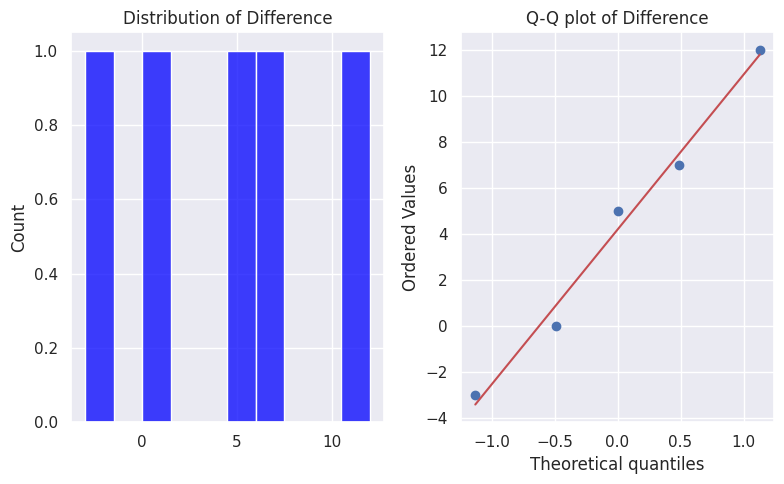

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(8,5))

sns.histplot(diff, bins=10, ax=axes[0], color="blue" )
axes[0].set_title("Distribution of Difference")

stats.probplot(diff, dist='norm', plot=axes[1] )
axes[1].set_title("Q-Q plot of Difference")

plt.tight_layout()
plt.show()

To verify if the that being normally distributed is more obvious by looking at the QQ plot than the histogram. We can see in QQ plot that the points are close to the red line, which indicates that the data is normally distributed.

We will assuming that the differences are independent. The null and alternative hypothesis are given below:

$$H_0: \mu_{\text{pos}} - \mu_{\text{pre}} = 0$$ 
$$H_a: \mu_{\text{pos}} - \mu_{\text{pre}} > 0$$

or we can write $\mu_{\text{pos}} - \mu_{\text{pre}}$ as $\mu_{\text{d}}$, and the hypothesis becomes:
$$H_0: \mu_{\text{d}} = 0$$ 
$$H_a: \mu_{\text{d}} > 0$$

The test statistic is computed by:
$$ t = \frac{\bar{d} - \mu_{d}}{s_d/\sqrt{n}}$$

Where, $\bar{d}$ is the sample mean of the differences and $S_d$ is the sample standard deviation of differences.\
The paired t-test is reduced to a one-sample t-test.

In [47]:
t_statistic, p_value = stats.ttest_rel(pos_score, pre_score, alternative='greater')

print(f"The test statistic is {t_statistic:.4f} and the correspondent p-value is {p_value:.4f}.")

The test statistic is 1.5943 and the correspondent p-value is 0.0930.


The result shows that the p-value is 0.0930 which is greater than the level of significance ($\alpha = 0.05$), so we fail to reject the hull hypothesis. We can say that the post-training score is not different from the pre-training score or we don't have enough evidence to reject the null hypothesis.

## 3 - Test with more than two groups and ANOVA

Two methods for testing differences between groups we will cover:

- Pairwise test with the **Bonferroni correction**
- ANOVA

When testing for differences between more than two groups, we will have to use multiple tests, which will affect our type I erro rate , because each new test we accumulate chances of wrongly rejecting the null hypothesis, even when it's true.

How the multiple test affect the type I error rate?

If we make many tests with each one having a level of significance $\alpha = 0.05$, the probability that one of this test gets a type I error grows. We can calculate approximately the accumulate erro ($\alpha_{\text{total}}$) with $k$ independent test by:
$$\alpha_{\text{total}} = 1 - (1- \alpha)^k$$

If we compare to two groups ($k = 1$), because we only make one test, the type I erro continue $5\%$, but if we compare to five grous ($k = 10$), the total type I erro is 0.4013 or 40.13%. 

In other world, we have a 40% chance of making one type I erro! So, if more test, more is the risk of to make a false positive.

obs.: To calculate the $k$ is just a combinations of all grupos $C_{n, p} = \frac{n!}{p!(n-p)!}$, where $p$ is the number of groups and $n$ is the total number of observations.

We can define the two situations for type I erro:

- **IER: Individual erro rate** that expected type I error rate for am individual hypothesis test.
- **FWER: Familywise error rate** that expected type I error rate for a group of hypothesis test.

Next, we discuss to correct the p-value.

### 3.1 - Bonferroni correction

The first method is the Bonferroni correction. This method is used to adjusting the p-value to control multiple hypothesis test. The Bonferroni correction controls the FWER by uniformly reducing the significance level of each individual test in the family of test. 

For $k$ test in a family each with the p-value $p_i$, then the p-value corrections is given by:
$$p_i \leq \frac{\alpha}{k}$$

Taking the exemple before, we have five groups, which is $k=10$ test. Assuming that the FWER be $\alpha=0.05$, then the Bonferroni corrections, the level of significance for the 10 individual test is 
$$\frac{0.05}{10} = 0.005$$

Thus, in this example, any of the individual test would be required to have a p-value of 0.005 to be considered significant.

In [48]:
data = pd.read_csv("auto-mpg.csv", sep='\s+')
data

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_16996/2991538348.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("auto-mpg.csv", sep='\s+')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [49]:
data[data["origin"] == 1]["mpg"].sample(60, random_state=42)

200    18.0
6      14.0
135    18.0
85     13.0
160    17.0
264    18.1
290    15.5
269    30.9
9      15.0
152    19.0
295    35.7
336    23.6
298    23.0
386    25.0
92     13.0
351    34.4
287    16.5
16     18.0
237    30.5
33     19.0
395    32.0
26     10.0
162    15.0
93     14.0
259    20.8
62     13.0
73     13.0
10     15.0
39     14.0
169    20.0
296    27.4
42     12.0
206    26.5
232    16.0
34     16.0
159    14.0
25     10.0
289    16.9
257    19.4
231    15.5
166    13.0
134    16.0
156    16.0
271    23.2
284    20.6
17     21.0
288    18.2
94     13.0
256    20.5
47     19.0
193    24.0
229    16.0
316    19.1
168    23.0
202    17.5
91     13.0
338    27.2
227    19.0
251    20.2
221    17.5
Name: mpg, dtype: float64

In [50]:
group_1 = data[data["origin"] == 1]["mpg"].sample(60, random_state=42)
group_2 = data[data["origin"] == 2]["mpg"].sample(60, random_state=42)
group_3 = data[data["origin"] == 3]["mpg"].sample(60, random_state=42)

In [51]:
t_stat_group_12, p_value_group_12 = stats.ttest_ind(group_1, group_2)
t_stat_group_13, p_value_group_13 = stats.ttest_ind(group_1, group_3)
t_stat_group_23, p_value_group_23 = stats.ttest_ind(group_2, group_3)

alpha = 0.01
k = 3
alpha_corrected = alpha / k
print(f"The level of significance corrected is {alpha_corrected:.5f}")
print("-"*45)
print(f"Null hypothesis".ljust(20), "Uncorrected p-value")
print("="*42)
print(f"mu_1 - mu_2 = 0".ljust(20), float(p_value_group_12))
print(f"mu_1 - mu_3 = 0".ljust(20), float(p_value_group_13))
print(f"mu_2 - mu_3 = 0".ljust(20), float(p_value_group_23))

print()

print(f"Null hypothesis".ljust(20), "Corrected p-value")
print("="*42)
print(f"mu_1 - mu_2 = 0".ljust(20), float(min(p_value_group_12 * k, 1.0)))
print(f"mu_1 - mu_3 = 0".ljust(20), float(min(p_value_group_13 * k, 1.0)))
print(f"mu_2 - mu_3 = 0".ljust(20), float(min(p_value_group_23 * k, 1.0)))

The level of significance corrected is 0.00333
---------------------------------------------
Null hypothesis      Uncorrected p-value
mu_1 - mu_2 = 0      7.946116336281346e-12
mu_1 - mu_3 = 0      4.60851195723903e-19
mu_2 - mu_3 = 0      0.04209261045522689

Null hypothesis      Corrected p-value
mu_1 - mu_2 = 0      2.383834900884404e-11
mu_1 - mu_3 = 0      1.382553587171709e-18
mu_2 - mu_3 = 0      0.1262778313656807


To understand how to use the Bonferroni Correction, we can adjust the $\alpha$, the level of significance and/or the p-value. Both can be correct, but when we go to make the analysis we need to use the correct to compare. 

- We use $\alpha$ corrected to compare with the original p-value;
- We use p-value corrected to compare with the original $\alpha$;


<div align='center'>

| Null Hypothesis | Uncorrected p-value compared to corrected $\alpha = 0.01667$ | Reject the Null Hypothesis |
|-----------------|-------------------------------------------------------------|----------------------------|
| $\mu_1 - \mu_2$ |7.946116336281346e-12                                        |Accepted                    |
| $\mu_1 - \mu_3$ |4.60851195723903e-19                                         |Accepted                    |
| $\mu_2 - \mu_3$ |0.04209261045522689                                          |Fail                        |
|-----------------|-------------------------------------------------------------|----------------------------|
| Null Hypothesis | Corrected p-value compared to original $\alpha = 0.05$      | Reject the Null Hypothesis |
| $\mu_1 - \mu_2$ | 2.383834900884404e-11                                       |Accepted                    |
| $\mu_1 - \mu_3$ | 1.382553587171709e-18                                       |Accepted                    |
| $\mu_2 - \mu_3$ | 0.1262778313656807                                          |Fail                        |

<div align='left'>


We can use both, they give us the same answer.

### 3.2 - ANOVA

**ANOVA** is a statistical test for determining whether there is a difference between means of several groups. The null hypothesis is no difference in means, and the alternative hypothesis is the means are not all equal.

Anova versus pairwise test

While pairwise testing is a general procedure for testing for differences between groups, **ANOVA can only be used to test for differences in means**

In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
f_stat, p_value = stats.f_oneway(group_1, group_2, group_3)

print(f"The test statistic is {f_stat} and the correspondent p-value is {p_value}")

The test statistic is 98.54179491075871 and the correspondent p-value is 1.9154864184128e-35


The result shows that the p-value is close to zero, which is less than the level of significance. So, we can reject the null hypothesis and we have a difference in the means of the groups. Now we can use the Pairwise tests or the Welch's test to identify which specific means differ.

### 3.3 - Person's correlation coefficient

Also called Person's *r* is a bivariate test test that measures the linear correlation between two variables. The test results in a ranging from -1 to 1 where -1 is a strong, inverse correlation and 1 is a strong, direct correlation. A zero valued coefficient indicates no correlation.

<div align='center'>

|Coefficient | Correlation            |
|------------|------------------------|
|-1          | Strong inverse correl. |
|1           | Strong direct corrl.   |
|$\pm$ 0.1 to $\pm$ 0.3| Week correl.|
|$\pm$ 0.3 to $\pm$ 0.5| Moderate correl.|
|$\pm$ 0.5 to $\pm$ 1| Strong correl.|

<div align='left'>

This test is considered parametric **but does not require assumptions of normal distributions or homogeneity of variance**

But required that **data be independently sampled**, **have finite variance** and **be of a continuous data type**.

The equation for the **population** Person's coefficient, $\rho$, is:
$$\rho = \frac{\rho_{xy}}{\rho_{x}\rho_{y}}$$

where, $\rho_{xy}$ is the **population** covariance, calculated as follows:

$$\rho_{xy}=\frac{\sum^N_{i=1}(x_i-\mu_x)(y_i-\mu_y)}{N}$$

Now, for **sample** Pearson's coefficient, *r*, is:
$$r = \frac{S_{xy}}{S_{x}S_{y}}$$

where, $S_{xy}$ is the **sample** covariance, calculated as follows:

$$S_{xy}=\frac{\sum^N_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{n-1}$$


In [ ]:
mu1, sigma1 = 0, 1.1
normally_distributed_1 = np.random.normal(mu1, sigma1, 1000)
mu2, sigma2 = 0, 0.7
normally_distributed_2 = np.random.normal(mu2, sigma2, 1000)

df_norm = pd.DataFrame({'Distribution': ['Distribution 1' for i in range(len(normally_distributed_1))] + ['Distribution 2' for i in range(len(normally_distributed_2))],
                        'X':np.concatenate([normally_distributed_1, normally_distributed_2])})

In [ ]:
df_norm[df_norm['Distribution']== 'Distribution 1']

,Distribution,X
0,Distribution 1,-0.341436
1,Distribution 1,-0.722519
2,Distribution 1,-1.186147
3,Distribution 1,0.394809
4,Distribution 1,-1.143773
...,...,...
995,Distribution 1,-0.767296
996,Distribution 1,-1.780705
997,Distribution 1,-1.226639
998,Distribution 1,0.080541


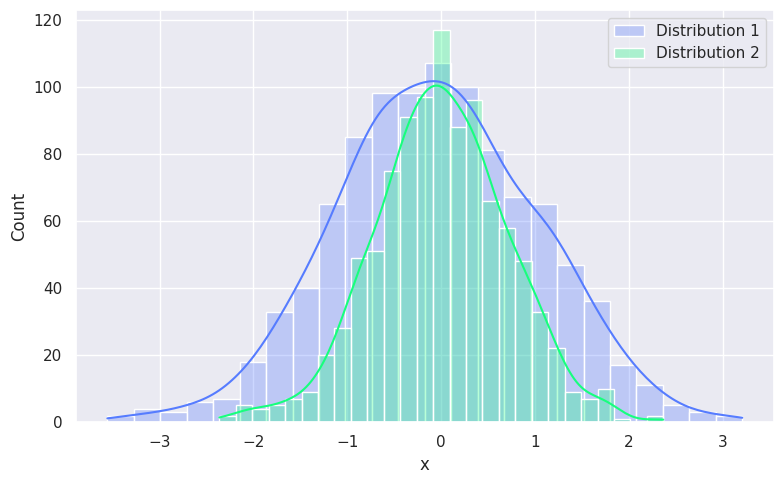

In [ ]:
fig = plt.figure(figsize=(8,5))
sns.histplot(data=df_norm[df_norm['Distribution']== 'Distribution 1'], kde=True, palette=['#567CFF'],  alpha= 0.3, label='Distribution 1')
sns.histplot(data=df_norm[df_norm['Distribution']== 'Distribution 2'], kde=True, palette=['#17FF7D'], alpha= 0.3, label='Distribution 2')


plt.xlabel('x')
plt.legend()
plt.tight_layout()
plt.show()

We can see the overlap of the population. Now, we want to test the correlations using the `pearsonr()` function.

In [ ]:
from scipy.stats import pearsonr
p, r = pearsonr(df_norm.loc[df_norm['Distribution'] == 'Distribution 1', 'X'], df_norm.loc[df_norm['Distribution'] == 'Distribution 2', 'X'])
print(f"The p-value is {p:.4f} and the Correlation coefficient is {r:.4f}")

The p-value is 0.0218 and the Correlation coefficient is 0.4920


The following output indicates that at a 0.05 level of significance, we have a 0.4920 level of correlation (p-value is 0.0218). The correlation is moderate.

We can understand the correlation in the other form, we could say the level of variance explained in distribution 2 by distribution 1 is given by $r^2$, also called **goodness-of-fit** or the **coefficient of determination**. In our case, the $r^2$ is $0.4920^2 = 24\%$.


In [ ]:
import statsmodels.api as sm
df_cars = sm.datasets.get_rdataset("mtcars", "datasets").data
df_cars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


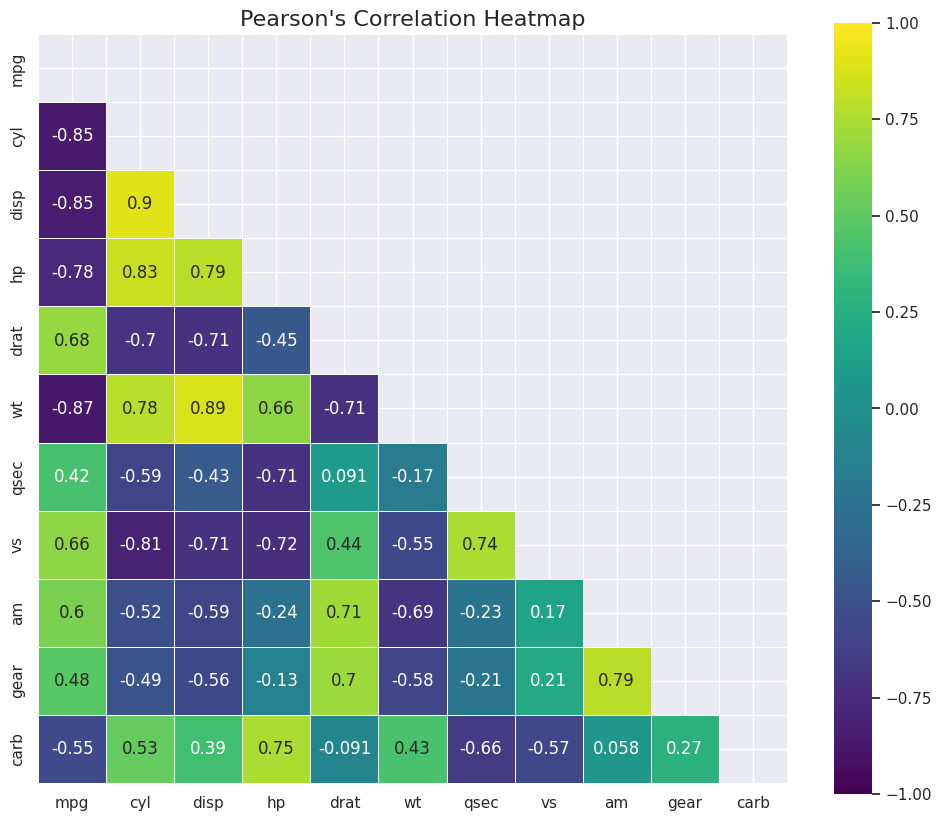

In [ ]:
corr = df_cars.corr()

mask = np.zeros_like(corr, dtype=bool)  # Substituído np.bool por bool
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(corr,  mask=mask, cmap='viridis', vmax=1, vmin=-1, center=0, square=True, linewidths=.5, annot=True,  cbar_kws={'shrink': 0.8})
plt.title("Pearson's Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

With the heatmap of pearson's correlation we can identify the pair of variables with strong correlation.

## 4 - Summary 

When to Use Each Statistical Test for Mean Comparison

| **Test**                     | **Number of Groups** | **Sample Type**       | **Assumptions**                                      | **When to Use** |
|------------------------------|----------------------|----------------------|-----------------------------------------------------|-----------------|
| **One-Sample t-Test**        | 1                    | Independent          | Normally distributed data                           | Compare the sample mean to a fixed/population value |
| **Two-Sample t-Test (Pooled)** | 2                    | Independent          | Normality + equal variances                         | Compare means of two groups with **equal variances** |
| **Two-Sample t-Test (Welch’s)** | 2                    | Independent          | Normality + **unequal variances**                   | Compare means of two groups with **unequal variances** |
| **Paired t-Test**            | 2                    | Dependent (Paired)   | Normality of the difference between pairs          | Compare **before and after** for the same subjects or related samples |
| **One-Way ANOVA**            | 3+                   | Independent          | Normality + equal variances                         | Compare means of **3 or more groups** with equal variances |
| **Welch’s ANOVA**            | 3+                   | Independent          | Normality + **unequal variances**                   | Compare means of **3 or more groups** without assuming equal variance |
| **Pearson’s Correlation**     | 2                    | Numerical            | Linearity + normality of residuals                  | Measure the strength of a linear relationship between two numerical variables |
